In [28]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os

# Load 3D Brain MRI image

In [49]:
# Load the .nii file using Nibabel
image = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii')

# Transform the image in 3D-array format
image_data = image.get_fdata()

# Check the shape of 3D-MRI
print("The shape of 3D MRI is:",image_data.shape)

The shape of 3D MRI is: (113, 137, 113)


Explain the 3D shape, here here

In [50]:
def find_two_numbers(product):
    numbers = []
    for i in range(1, int(product**0.5) + 1):
        if product % i == 0:
            divisor = i
            quotient = product // i
            numbers.append((divisor, quotient))

    return numbers
    
def min_absolute_difference_pair(pairs):
    if len(pairs) < 2:
        raise ValueError("Size cannot be determined")
    
    min_difference_pair = pairs[0]
    min_absolute_difference = abs(pairs[0][0] - pairs[0][1])

    for pair in pairs[1:]:
        current_difference = abs(pair[0] - pair[1])
        if current_difference < min_absolute_difference:
            min_absolute_difference = current_difference
            min_difference_pair = pair

    return min_difference_pair

def get_subplot_size(number):
    pairs = find_two_numbers(number)
    subplot_size = min_absolute_difference_pair(pairs)

    return subplot_size

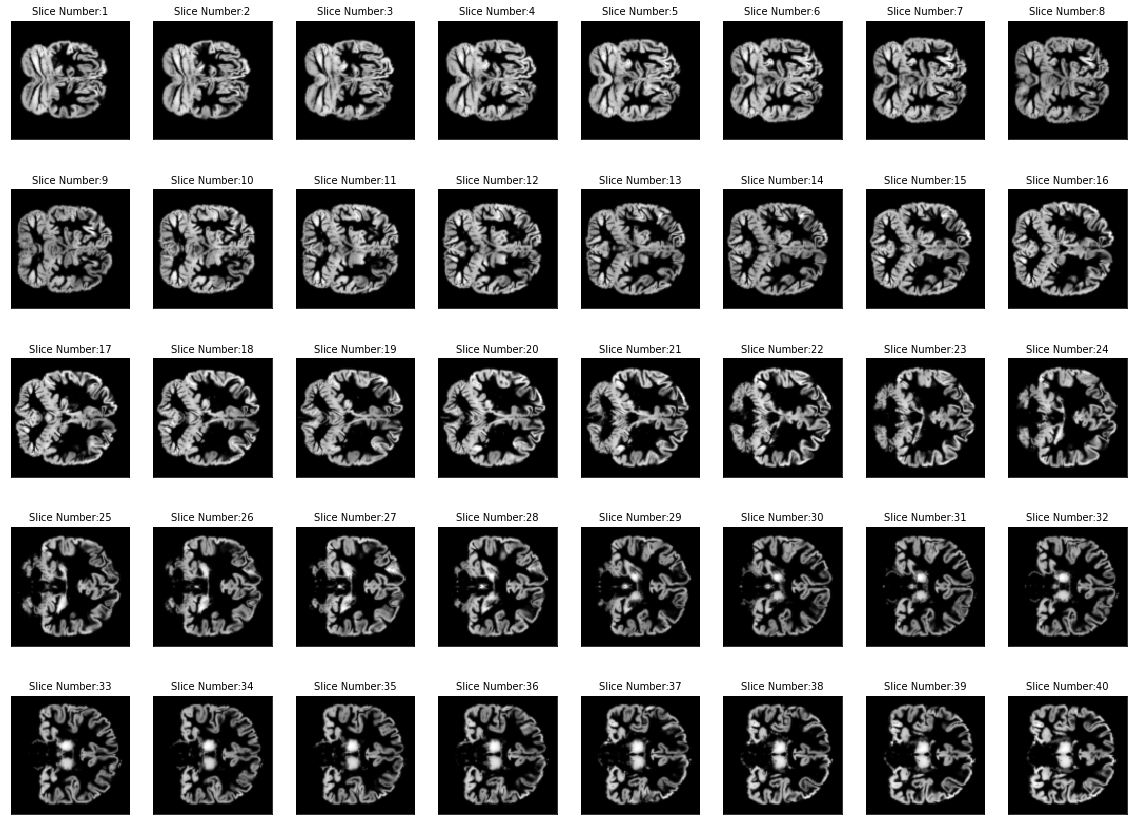

In [51]:
slices = []
for i in range(30,70,1):
    image_data = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii').get_fdata()
    slices.append(image_data[:,i,:])

fig = plt.figure(figsize=(20, 15))
for i, a in enumerate(slices):
    ax = fig.add_subplot(get_subplot_size(len(slices))[0], get_subplot_size(len(slices))[1], i+1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(f"Slice Number:{i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

In [24]:
class MeanTransformation():
    """3D-MR Mean Transformation

    Parameters
    ------------
    filepath : str
    Define the filepath of .nii image

    axis : str, default = "coronal"
    Define the axis of the brain

    add_channel : bool, default = False
    get_std : bool, default = False
    """
    
    _parameter_constraints: dict = {
        "axis": ['coronal', 'axial', 'sagittal']
    }

    def __init__(
        self,
        filepath,
        axis="coronal",
        add_channel=False,
    ):
        if axis not in self._parameter_constraints["axis"]:
            raise ValueError(f"Invalid value for 'axis'. Allowed values are {self._parameter_constraints['axis']}")

        if not os.path.isfile(filepath):
            raise ValueError(f"Invalid file: {filepath}")

        self.axis = axis
        self.add_channel = add_channel
        self.filepath = filepath

    def _load_nii(self, filepath):
        image = nibabel.load(filepath)
        image_data = image.get_fdata()

        return image_data

    def _get_axis_number(self, axis):
        axis_info = {'sagittal': 0, 'axial': 1, 'coronal': 2}
        return axis_info[axis]

    def _get_mean_image(self, image):
        axis_number = self._get_axis_number(self.axis)
        mean_image = np.mean(image, axis=axis_number)
        if self.add_channel:
            norm_mean = (mean_image - np.min(mean_image)) / (np.max(mean_image) - np.min(mean_image))
            mean_image = np.stack([norm_mean, norm_mean, norm_mean], axis=-1)

        return mean_image

    def _get_std_image(self, image):
        axis_number = self._get_axis_number(self.axis)
        std_image = np.mean(image, axis=axis_number)
        if self.add_channel:
            norm_std = (std_image - np.min(std_image)) / (np.max(std_image) - np.min(std_image))
            std_image = np.stack([norm_std, norm_std, norm_std], axis=-1)

        return std_image

    def get_image(self):
        image_data = self._load_nii(self.filepath)
        mean_image = self._get_mean_image(image_data)
        std_image = self._get_std_image(image_data)

        return mean_image, std_image

In [25]:
filepath = '/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii'
transformer = MeanTransformation(filepath=filepath)

In [27]:
mean_image = transformer.get_image()
mean_image

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))